# Problem statement. Build a recommender system by using cosine simillarties score.

In [12]:
import pandas as pd
pd.set_option("display.max_rows",500)

In [38]:
book=pd.read_csv("book.csv",encoding='ISO-8859-1')
book

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [39]:
book=book.drop(['Unnamed: 0'],axis=1)
book

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [40]:
book.rename(columns={'User.ID':'userId','Book.Title':'booktitle','Book.Rating':'bookrating'},inplace=True)

In [98]:
book1 = pd.DataFrame(book)
book1

,userId,booktitle,bookrating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [41]:
book[book["booktitle"]=='Charlie and the Chocolate Factory']

,userId,booktitle,bookrating
6373,3326,Charlie and the Chocolate Factory,8
6968,3719,Charlie and the Chocolate Factory,7
9103,161577,Charlie and the Chocolate Factory,6
9129,161619,Charlie and the Chocolate Factory,5


In [100]:
book.shape

(10000, 3)

In [43]:
book.userId.value_counts()

3757      523
162052    214
2276      212
4017      156
277427    150
         ... 
969         1
967         1
965         1
951         1
162129      1
Name: userId, Length: 2182, dtype: int64

In [44]:
book.sort_values([])

,userId,booktitle,bookrating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


<AxesSubplot:>

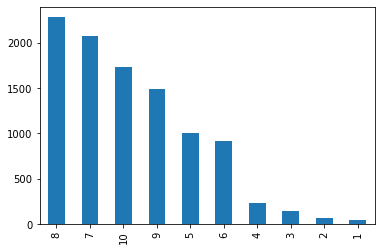

In [45]:
book["bookrating"].value_counts().plot(kind='bar')

In [46]:
book[book["userId"]==3757].head(100)

,userId,booktitle,bookrating
6998,3757,The Strange Case of Dr. Jekyll and Mr. Hyde an...,7
6999,3757,Almost Vegetarian : A Primer for Cooks Who Are...,8
7000,3757,The Adventures of Buckaroo Banzai : Across the...,6
7001,3757,A General Theory of Love,7
7002,3757,"The Best American Essays, 1989 (Best American ...",7
7003,3757,Henry V (Folger Shakespeare Library),7
7004,3757,Ravelstein,9
7005,3757,How We Choose to Be Happy: The 9 Choices of Ex...,7
7006,3757,One More Day: Daily Meditations for People Wit...,6
7007,3757,The Bluest Eye,7


In [47]:
#find out similarities between the products
#choose top 100 similar products 
#recommend based on this 

In [48]:
len(book["userId"].unique())

2182

In [49]:
len(book["bookrating"].unique())

10

In [50]:
len(book["booktitle"].unique())

9659

In [51]:
book["booktitle"].value_counts()

Fahrenheit 451                                              5
Charlie and the Chocolate Factory                           4
The Subtle Knife (His Dark Materials, Book 2)               4
Vanished                                                    4
Ender's Game (Ender Wiggins Saga (Paperback))               4
                                                           ..
Murder on St. Mark's Place (Gaslight Mysteries)             1
State of Grace                                              1
Valsalva's Maneuver: Mots Justes and Indispensable Terms    1
I love you, I hate you                                      1
Kids Say the Darndest Things                                1
Name: booktitle, Length: 9659, dtype: int64

In [52]:
book[book["userId"]==162121]

,userId,booktitle,bookrating
9990,162121,The Cloister Walk,7
9991,162121,Open Water,5
9992,162121,The Evolution of Jane,8
9993,162121,AT PARADISE GATE,8
9994,162121,I Should Have Stayed Home: The Worst Trips of ...,8
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [103]:
user_book=book.pivot_table(index='booktitle',columns='userId',values='bookrating')
user_book

userId,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
booktitle,,,,,,,,,,,,,,,,,,,,,
"Jason, Madison &amp",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other Stories;Merril;1985;McClelland &amp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Repairing PC Drives &amp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"\Well, there's your problem\: Cartoons",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iI Paradiso Degli Orchi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN


In [104]:
user_book.isin([6]).sum()

userId
8         2
9         1
10        1
12        0
14        1
         ..
278846    0
278849    0
278851    0
278852    0
278854    1
Length: 2182, dtype: int64

In [105]:
user_book.isna().sum()

userId
8         9652
9         9658
10        9658
12        9658
14        9656
          ... 
278846    9658
278849    9658
278851    9645
278852    9658
278854    9653
Length: 2182, dtype: int64

In [106]:
user_book.fillna(0,inplace=True)
user_book

userId,8,9,10,12,14,16,17,19,22,26,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
booktitle,,,,,,,,,,,,,,,,,,,,,
"Jason, Madison &amp",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Other Stories;Merril;1985;McClelland &amp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Repairing PC Drives &amp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\Well, there's your problem\: Cartoons",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
iI Paradiso Degli Orchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0


In [107]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [108]:
book_sim=1-pairwise_distances(user_book.values,metric='cosine')
book_sim

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [109]:
book_sim_df=pd.DataFrame(book_sim)

In [117]:
book_sim_df

,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
"Jason, Madison &amp",1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Other Stories;Merril;1985;McClelland &amp,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Repairing PC Drives &amp,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'48,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
"\Well, there's your problem\: Cartoons",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
iI Paradiso Degli Orchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
stardust,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [118]:
list(user_book.columns)

[8,
 9,
 10,
 12,
 14,
 16,
 17,
 19,
 22,
 26,
 32,
 39,
 42,
 44,
 51,
 53,
 56,
 64,
 67,
 69,
 70,
 73,
 75,
 78,
 81,
 82,
 83,
 85,
 86,
 87,
 88,
 91,
 92,
 97,
 99,
 102,
 107,
 109,
 110,
 114,
 125,
 129,
 133,
 137,
 141,
 160,
 162,
 165,
 169,
 176,
 178,
 182,
 183,
 185,
 190,
 202,
 212,
 215,
 217,
 221,
 224,
 226,
 228,
 230,
 232,
 233,
 242,
 243,
 244,
 247,
 249,
 254,
 256,
 257,
 269,
 272,
 273,
 278,
 280,
 289,
 291,
 300,
 302,
 310,
 313,
 316,
 323,
 326,
 332,
 334,
 337,
 339,
 345,
 356,
 361,
 362,
 367,
 369,
 372,
 376,
 382,
 383,
 387,
 388,
 392,
 393,
 406,
 408,
 413,
 424,
 430,
 431,
 432,
 433,
 440,
 441,
 444,
 446,
 447,
 453,
 460,
 463,
 472,
 475,
 476,
 479,
 486,
 487,
 489,
 493,
 494,
 496,
 499,
 500,
 503,
 505,
 507,
 508,
 512,
 513,
 523,
 530,
 537,
 538,
 542,
 546,
 558,
 565,
 566,
 567,
 585,
 592,
 595,
 596,
 614,
 618,
 619,
 620,
 621,
 623,
 625,
 626,
 628,
 634,
 638,
 639,
 640,
 641,
 643,
 649,
 650,
 651,
 657,

In [119]:
book_sim_df.index=list(user_book.index)
book_sim_df.columns=list(user_book.index)

In [120]:
book_sim_df

,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
"Jason, Madison &amp",1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Other Stories;Merril;1985;McClelland &amp,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Repairing PC Drives &amp,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'48,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
"\Well, there's your problem\: Cartoons",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
iI Paradiso Degli Orchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
stardust,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [121]:
import numpy as np

In [122]:
book_sim_df

,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
"Jason, Madison &amp",1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Other Stories;Merril;1985;McClelland &amp,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Repairing PC Drives &amp,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'48,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
"\Well, there's your problem\: Cartoons",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
iI Paradiso Degli Orchi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
stardust,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [125]:
book_sim_df.sort_values(by='Jason, Madison &amp',ascending=False)

KeyError: 'Jason, Madison &amp'

In [84]:
def give_reco(customer_id):
    tem=list(book_sim_df.sort_values([customer_id],ascending=False).head(100).index)
    #print(tem)
    book_list=[]
    for i in tem:
        book_list=book_list+list(book[book["userId"]==i]["booktitle"])
    #print(book_list)
    return set(book_list)-set(book[book["userId"]==customer_id]["booktitle"])

In [92]:
#function to recommend the books
give_reco(3537)

{"'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities",
 '20,001 Names for Baby',
 '24 Hours',
 '500 palabras nuevas para ti / 500 Words To Grow On',
 'A Certain Justice: A Novel',
 "A Child's Night Dream",
 'A Darkness More Than Night',
 'A Dog Year: Twelve Months, Four Dogs, and Me',
 "A False Sense of Well Being (Ballantine Reader's Circle)",
 'A Flash in the Pan: 100 Fast and Furious Recipes for Wok and Stir-Fry',
 'A Free Man of Color (Benjamin January (Paperback))',
 'A GATHERING OF SAINTS',
 'A Lady Never Trifles with Thieves',
 'A Letter of Mary (Mary Russell Novels (Paperback))',
 'A Letter to Harvey Milk: Short Stories',
 'A Light in the Attic',
 'A Pocket Guide to Oahu',
 "A Single Tear: A Family's Persecution, Love, and Endurance in Communist China",
 'A Wreath for Rivera',
 'A lexicon of Jewish cooking: A collection of folklore, foodlore, history, customs, and recipes',
 'Acceptable Risk',
 'After All These Years',
 "Ain't I A Woman!: A Book of Women's Po

In [93]:
print(len(give_reco(278831)))

478


In [95]:
book_sim_df.max().head(100)

8      1.0
9      1.0
10     1.0
12     1.0
14     1.0
16     1.0
17     1.0
19     1.0
22     1.0
26     1.0
32     1.0
39     1.0
42     1.0
44     1.0
51     1.0
53     1.0
56     1.0
64     1.0
67     1.0
69     1.0
70     1.0
73     1.0
75     1.0
78     1.0
81     1.0
82     1.0
83     1.0
85     1.0
86     1.0
87     1.0
88     1.0
91     1.0
92     1.0
97     1.0
99     1.0
102    1.0
107    1.0
109    1.0
110    1.0
114    1.0
125    1.0
129    1.0
133    1.0
137    1.0
141    1.0
160    1.0
162    1.0
165    1.0
169    1.0
176    1.0
178    1.0
182    1.0
183    1.0
185    1.0
190    1.0
202    1.0
212    1.0
215    1.0
217    1.0
221    1.0
224    1.0
226    1.0
228    1.0
230    1.0
232    1.0
233    1.0
242    1.0
243    1.0
244    1.0
247    1.0
249    1.0
254    1.0
256    1.0
257    1.0
269    1.0
272    1.0
273    1.0
278    1.0
280    1.0
289    1.0
291    1.0
300    1.0
302    1.0
310    1.0
313    1.0
316    1.0
323    1.0
326    1.0
332    1.0
334    1.0
337    1.0